In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("placement.csv")

In [6]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [18]:
df.shape

(1000, 3)

C:\Users\umark\AppData\Local\Temp\ipykernel_17380\2890997503.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["cgpa"])
C:\Users\umark\AppData\Local\Temp\ipykernel_17380\2890997503.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["placement_exam_marks"])


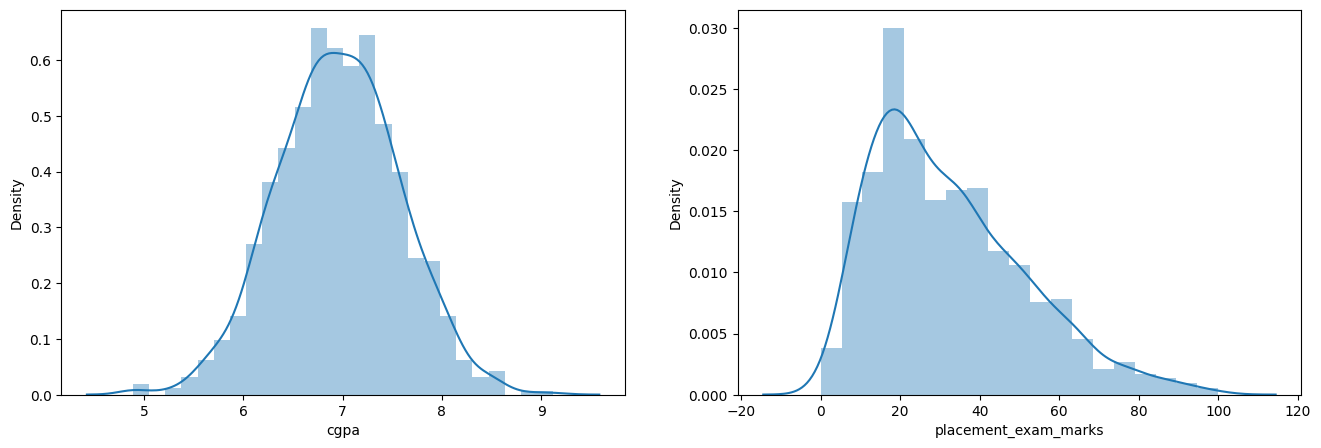

In [10]:
plt.figure(figsize=(16 , 5))
plt.subplot(1 , 2 ,1)
sns.distplot(df["cgpa"])

plt.subplot(1 , 2 , 2)
sns.distplot(df["placement_exam_marks"])

plt.show()

In [11]:
print("Mean of cgpa" , df["cgpa"].mean())
print("std of cgpa" , df["cgpa"].std())
print("Min of cgpa" , df["cgpa"].min())
print("Max of cgpa" , df["cgpa"].max())

Mean of cgpa 6.96124
std of cgpa 0.6158978751323896
Min of cgpa 4.89
Max of cgpa 9.12


In [12]:
print("highest allowed" , df['cgpa'].mean() + 3*df['cgpa'].std())
print("lowest allowed" , df['cgpa'].mean() - 3*df['cgpa'].std())

highest allowed 8.808933625397168
lowest allowed 5.113546374602832


In [16]:
df[(df["cgpa"] > 8.808) | (df['cgpa'] < 5.113)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [17]:
#Trimming

new_df = df[(df["cgpa"] < 8.808) & (df['cgpa'] > 5.113)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [19]:
df["z_score"] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std() 

In [20]:
df.head()

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [22]:
again_new = df[(df['z_score']<3) & (df['z_score']>-3)]

In [23]:
again_new

,cgpa,placement_exam_marks,placed,z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


In [26]:
# Capping

upper_limit = df['cgpa'].mean() + df['cgpa'].std()
lower_limit = df['cgpa'].mean() - df['cgpa'].std()

In [27]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit , 
        df['cgpa']
    )
)

In [28]:
df.shape

(1000, 4)

In [29]:
df.describe()

,cgpa,placement_exam_marks,placed,z_score
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.960829,32.225000,0.489000,-1.465494e-16
std,0.443103,19.130822,0.500129,1.000000e+00
min,6.345342,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,7.577138,100.000000,1.000000,3.505062e+00
